In [16]:
import requests as req
import json
import pandas as pd
import numpy as np
import datetime
import os
from mpl_finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [26]:
apple_df = pd.read_csv('historical_data/AAPL.csv',header=0)
microsoft_df = pd.read_csv('historical_data/MSFT.csv',header=0)

apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-17,75.385712,75.709999,75.121429,75.248573,67.554192,49886200
1,2014-03-18,75.128571,75.995712,75.028572,75.914284,68.151825,52411800
2,2014-03-19,76.037140,76.605713,75.571426,75.894287,68.133865,56189000
3,2014-03-20,75.698570,76.095711,75.335716,75.528572,67.805550,52099600
4,2014-03-21,75.989998,76.250000,75.190002,76.124283,68.340355,93511600


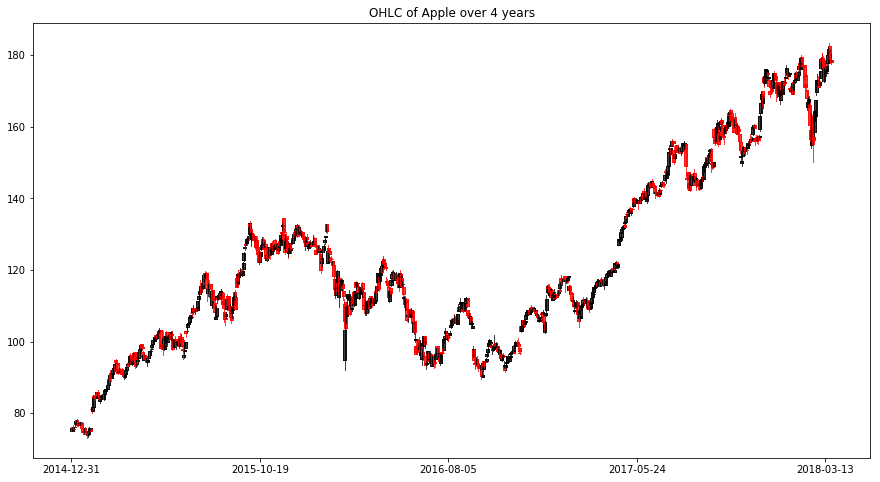

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(w=15,h=8,forward=True)
candlestick2_ohlc(ax,apple_df['Open'],apple_df['High'],apple_df['Low'],apple_df['Close'])
plt.title('OHLC of Apple over 4 years')

num_ticks = 5

inv_ticks = int(len(apple_df['Date'])/num_ticks)
plt.xticks([i for i in range(num_ticks)],[apple_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

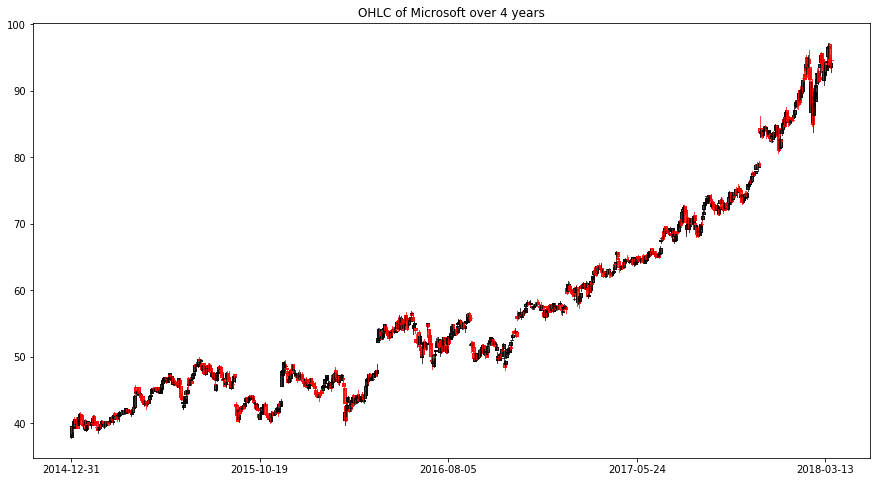

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(w=15,h=8,forward=True)
candlestick2_ohlc(ax,microsoft_df['Open'],microsoft_df['High'],microsoft_df['Low'],microsoft_df['Close'])
plt.title('OHLC of Microsoft over 4 years')

num_ticks = 5

inv_ticks = int(len(microsoft_df['Date'])/num_ticks)
plt.xticks([i for i in range(num_ticks)],[microsoft_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

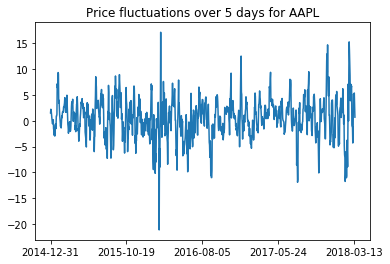

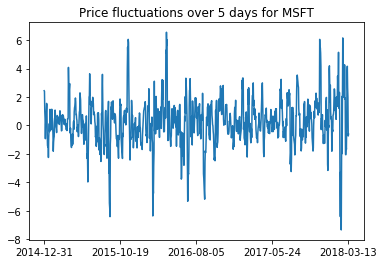

In [43]:
apple_differences = list()
microsoft_differences = list()


step = 5

for i in range(len(apple_df['Open'])-step):
    apple_differences.append(apple_df['Open'][i+step]-apple_df['Open'][i])
    microsoft_differences.append(microsoft_df['Open'][i+step]-microsoft_df['Open'][i])
   


num_ticks = 5

inv_ticks = int(len(apple_df['Date'])/num_ticks)
    
    
fig, ax = plt.subplots()
plt.plot(apple_differences)
plt.title('Price fluctuations over %s days for AAPL'%str(step))
plt.xticks([i for i in range(num_ticks)],[apple_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(microsoft_differences)
plt.title('Price fluctuations over %s days for MSFT'%str(step))
plt.xticks([i for i in range(num_ticks)],[microsoft_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

In [37]:
top20 = int(len(apple_differences)/5)
top_index_apple = sorted(range(len(apple_differences)), key=lambda i: apple_differences[i])[-top20:]
top_apple = [apple_differences[i] for i in top_index_apple]
top_apple[0:5]

[3.2599950000000035,
 3.2900010000000037,
 3.2999949999999956,
 3.300003000000004,
 3.300003000000004]

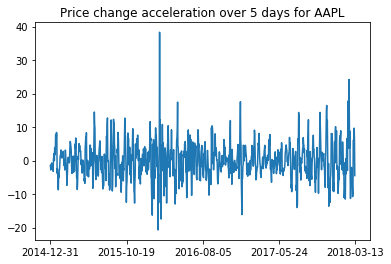

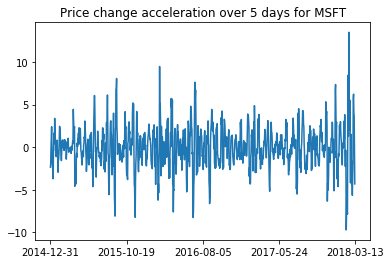

In [38]:
apple_accel = list()
microsoft_accel = list()


step = 5

for i in range(len(apple_differences)-step):
    apple_accel.append(apple_differences[i+step]-apple_differences[i])
    microsoft_accel.append(microsoft_differences[i+step]-microsoft_differences[i])
    

num_ticks = 5

inv_ticks = int(len(apple_df['Date'])/num_ticks)
    
    
fig, ax = plt.subplots()
plt.plot(apple_accel)
plt.title('Price change acceleration over %s days for AAPL'%str(step))
plt.xticks([i for i in range(num_ticks)],[apple_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(microsoft_accel)
plt.title('Price change acceleration over %s days for MSFT'%str(step))
plt.xticks([i for i in range(num_ticks)],[microsoft_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()


In [39]:
# find sign changes in acceleration analysis
signs = np.sign(apple_accel)
sign_changes_apple = ((np.roll(signs, 1) - signs) != 0).astype(int)
unique, counts = np.unique(sign_changes_apple,return_counts=True)
print(np.asarray((unique, counts)).T)

signs = np.sign(microsoft_accel)
sign_changes_microsoft = ((np.roll(signs, 1) - signs) != 0).astype(int)
unique, counts = np.unique(sign_changes_microsoft,return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 749]
 [  1 250]]
[[  0 759]
 [  1 240]]


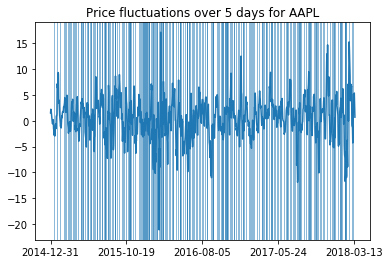

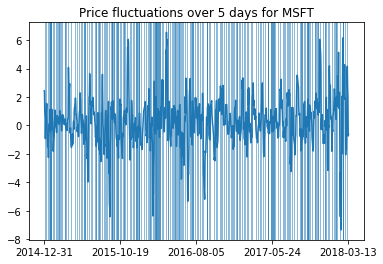

In [44]:
sign_changes_apple_normalized = np.append(sign_changes_apple,[0,0,0,0,0])
sign_changes_microsoft_normalized = np.append(sign_changes_microsoft,[0,0,0,0,0])


num_ticks = 5

inv_ticks = int(len(apple_df['Date'])/num_ticks)
    
xlist = [i for i in range(len(sign_changes_apple_normalized))]
    
fig, ax = plt.subplots()
plt.plot(apple_differences)
for x in xlist:
    if sign_changes_apple_normalized[x]==1:
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price fluctuations over %s days for AAPL'%str(step))
plt.xticks([i for i in range(num_ticks)],[apple_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(microsoft_differences)
for x in xlist:
    if sign_changes_microsoft_normalized[x]==1:
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price fluctuations over %s days for MSFT'%str(step))
plt.xticks([i for i in range(num_ticks)],[microsoft_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()


# The above replots the velocity analysis and highlights the detected events with vertical lines

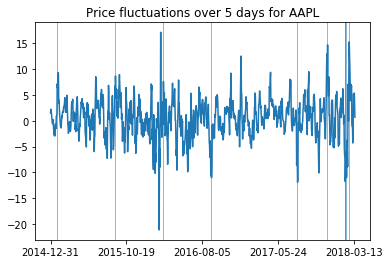

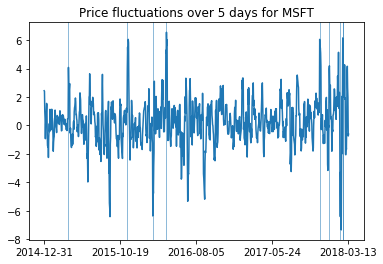

In [49]:
# Setting minimum limits for significant event
apple_lim = 7
microsoft_lim = 3.5

 

num_ticks = 5

inv_ticks = int(len(apple_df['Date'])/num_ticks)
    
xlist = [i for i in range(len(sign_changes_apple_normalized))]
    
fig, ax = plt.subplots()
plt.plot(apple_differences)
for x in xlist:
    if sign_changes_apple_normalized[x]==1 and (apple_differences[x]>apple_lim or apple_differences[x]<-apple_lim):
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price fluctuations over %s days for AAPL'%str(step))
plt.xticks([i for i in range(num_ticks)],[apple_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(microsoft_differences)
for x in xlist:
    if sign_changes_microsoft_normalized[x]==1 and (microsoft_differences[x]>microsoft_lim or microsoft_differences[x]<-microsoft_lim):
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price fluctuations over %s days for MSFT'%str(step))
plt.xticks([i for i in range(num_ticks)],[microsoft_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
